In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.display.max_rows=10

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
df_train=pd.read_csv('../input/train.csv',nrows=100000);df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


In [3]:
df_test=pd.read_csv('../input/test.csv');df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [4]:
df_test.sort_values(by='passenger_count') # passenger_count range from 1-6

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
4616,2014-11-06 01:40:49.0000002,2014-11-06 01:40:49 UTC,-73.990667,40.724494,-73.977593,40.687579,1
4615,2014-11-06 01:40:49.0000003,2014-11-06 01:40:49 UTC,-73.980066,40.770670,-73.975114,40.777353,1
4614,2014-08-05 16:09:05.0000001,2014-08-05 16:09:05 UTC,-73.966317,40.758152,-73.958534,40.769827,1
4613,2010-06-20 12:42:37.0000001,2010-06-20 12:42:37 UTC,-73.986405,40.759664,-74.009152,40.713137,1
...,...,...,...,...,...,...,...
9798,2014-04-27 02:57:00.00000066,2014-04-27 02:57:00 UTC,-74.002670,40.734142,-73.916578,40.757800,6
9799,2014-04-27 02:57:00.000000183,2014-04-27 02:57:00 UTC,-74.008648,40.725952,-74.003053,40.719735,6
9800,2014-04-27 02:57:00.000000179,2014-04-27 02:57:00 UTC,-73.982872,40.727082,-73.953780,40.719530,6
9780,2012-11-03 17:11:00.00000090,2012-11-03 17:11:00 UTC,-74.004545,40.747105,-73.989307,40.768172,6


In [5]:
df_test.sort_values(by='pickup_latitude') # pickup_latitude range from 40.5 to 42

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1229,2010-09-29 16:43:00.00000029,2010-09-29 16:43:00 UTC,-74.221278,40.573143,-74.217388,40.568973,1
898,2010-08-27 18:45:00.00000045,2010-08-27 18:45:00 UTC,-74.252193,40.583097,-74.263242,40.588140,1
2128,2011-12-13 22:00:00.00000026,2011-12-13 22:00:00 UTC,-73.973827,40.588395,-73.973012,40.592532,1
1255,2010-09-29 16:43:00.000000102,2010-09-29 16:43:00 UTC,-73.979853,40.604752,-73.973380,40.602778,1
9006,2013-07-02 22:27:14.0000001,2013-07-02 22:27:14 UTC,-73.988070,40.622553,-73.988070,40.622553,4
...,...,...,...,...,...,...,...
4080,2010-06-11 13:37:21.0000004,2010-06-11 13:37:21 UTC,-73.137393,41.366138,-73.984145,40.732925,1
8529,2009-11-25 19:32:52.0000001,2009-11-25 19:32:52 UTC,-73.137393,41.366138,-73.986561,40.757966,3
5683,2010-05-06 11:35:26.0000003,2010-05-06 11:35:26 UTC,-73.137393,41.366138,-73.137393,41.366138,1
6517,2009-06-04 19:34:15.0000001,2009-06-04 19:34:15 UTC,-73.137393,41.366138,-73.137393,41.366138,1


In [6]:
df_test.sort_values(by='pickup_longitude') # pickup longitude range from -74.25 to -72.98

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
898,2010-08-27 18:45:00.00000045,2010-08-27 18:45:00 UTC,-74.252193,40.583097,-74.263242,40.588140,1
1229,2010-09-29 16:43:00.00000029,2010-09-29 16:43:00 UTC,-74.221278,40.573143,-74.217388,40.568973,1
837,2010-08-27 18:45:00.000000158,2010-08-27 18:45:00 UTC,-74.083013,40.773612,-74.082352,40.780637,1
2939,2012-01-26 07:33:00.00000016,2012-01-26 07:33:00 UTC,-74.068953,40.854760,-74.069165,40.868258,1
8570,2011-12-13 22:00:00.00000051,2011-12-13 22:00:00 UTC,-74.059173,40.745220,-74.072165,40.751930,3
...,...,...,...,...,...,...,...
5683,2010-05-06 11:35:26.0000003,2010-05-06 11:35:26 UTC,-73.137393,41.366138,-73.137393,41.366138,1
5887,2010-07-04 16:44:11.0000002,2010-07-04 16:44:11 UTC,-73.137393,41.366138,-73.982629,40.767240,1
8529,2009-11-25 19:32:52.0000001,2009-11-25 19:32:52 UTC,-73.137393,41.366138,-73.986561,40.757966,3
8381,2009-07-30 15:49:15.0000002,2009-07-30 15:49:15 UTC,-73.137393,41.366138,-73.137393,41.366138,2


In [7]:
df_test.sort_values(by='dropoff_latitude') # dropoff latitude range from 40.56 to 41.69

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1229,2010-09-29 16:43:00.00000029,2010-09-29 16:43:00 UTC,-74.221278,40.573143,-74.217388,40.568973,1
2420,2010-09-20 16:48:00.00000095,2010-09-20 16:48:00 UTC,-74.000575,40.728915,-73.957603,40.577412,1
8560,2011-12-13 22:00:00.00000087,2011-12-13 22:00:00 UTC,-73.988543,40.748160,-73.952762,40.584438,3
5174,2011-05-17 23:42:46.0000004,2011-05-17 23:42:46 UTC,-73.957604,40.765554,-73.956755,40.584841,1
9057,2011-10-02 23:36:00.00000060,2011-10-02 23:36:00 UTC,-73.947537,40.631125,-73.932468,40.586420,5
...,...,...,...,...,...,...,...
2641,2009-11-24 08:58:48.0000006,2009-11-24 08:58:48 UTC,-73.137393,41.366138,-73.137393,41.366138,1
5683,2010-05-06 11:35:26.0000003,2010-05-06 11:35:26 UTC,-73.137393,41.366138,-73.137393,41.366138,1
8381,2009-07-30 15:49:15.0000002,2009-07-30 15:49:15 UTC,-73.137393,41.366138,-73.137393,41.366138,2
6517,2009-06-04 19:34:15.0000001,2009-06-04 19:34:15 UTC,-73.137393,41.366138,-73.137393,41.366138,1


In [8]:
df_test.sort_values(by='dropoff_longitude') # dropoff longitude range from -74.26 to -72.99

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
898,2010-08-27 18:45:00.00000045,2010-08-27 18:45:00 UTC,-74.252193,40.583097,-74.263242,40.588140,1
1229,2010-09-29 16:43:00.00000029,2010-09-29 16:43:00 UTC,-74.221278,40.573143,-74.217388,40.568973,1
7857,2014-03-04 16:24:45.0000001,2014-03-04 16:24:45 UTC,-73.955118,40.780181,-74.183779,40.688779,2
3044,2010-12-09 07:29:00.000000165,2010-12-09 07:29:00 UTC,-73.986638,40.758877,-74.183640,40.696600,1
643,2015-02-27 14:15:52.0000003,2015-02-27 14:15:52 UTC,-73.972412,40.756424,-74.183174,40.688011,1
...,...,...,...,...,...,...,...
5683,2010-05-06 11:35:26.0000003,2010-05-06 11:35:26 UTC,-73.137393,41.366138,-73.137393,41.366138,1
6517,2009-06-04 19:34:15.0000001,2009-06-04 19:34:15 UTC,-73.137393,41.366138,-73.137393,41.366138,1
8381,2009-07-30 15:49:15.0000002,2009-07-30 15:49:15 UTC,-73.137393,41.366138,-73.137393,41.366138,2
2641,2009-11-24 08:58:48.0000006,2009-11-24 08:58:48 UTC,-73.137393,41.366138,-73.137393,41.366138,1


In [9]:
df_train=df_train[(df_train.pickup_latitude>39)&(df_train.pickup_latitude<42)&(df_train.pickup_longitude>-74.5)&(df_train.pickup_longitude<-72)
                 &(df_train.dropoff_latitude>39)&(df_train.dropoff_latitude<42)&(df_train.dropoff_longitude>-74.5)&(df_train.dropoff_longitude<-72)]

In [10]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4


(array([1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 4.000e+00, 7.000e+00,
        8.000e+00, 1.200e+01, 1.100e+01, 3.500e+01, 6.810e+02, 7.620e+02,
        2.100e+01, 3.200e+01, 3.300e+01, 4.900e+01, 8.600e+01, 1.560e+02,
        2.370e+02, 2.920e+02, 2.890e+02, 1.250e+02, 6.380e+02, 1.402e+03,
        1.630e+03, 2.737e+03, 4.185e+03, 4.427e+03, 5.074e+03, 5.410e+03,
        7.180e+03, 6.981e+03, 8.245e+03, 9.166e+03, 9.991e+03, 6.816e+03,
        6.629e+03, 4.722e+03, 3.461e+03, 2.121e+03, 1.412e+03, 8.180e+02,
        6.530e+02, 5.610e+02, 2.120e+02, 1.270e+02, 8.900e+01, 5.800e+01,
        2.700e+01, 4.000e+01, 4.400e+01, 1.400e+01, 1.800e+01, 9.000e+00,
        8.000e+00, 1.300e+01, 2.000e+00, 8.000e+00, 4.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 0.000e+0

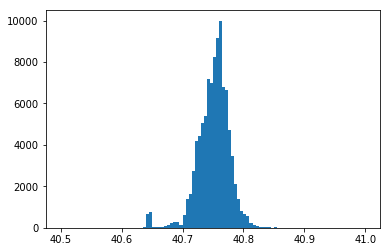

In [11]:
plt.hist(df_train['pickup_latitude'],bins=100,range=(40.5,41))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        9.0000e+00, 7.0000e+00, 2.0000e+00, 5.0000e+00, 1.0000e+01,
        8.0000e+00, 1.8000e+01, 1.9000e+01, 5.7000e+01, 1.2931e+04,
        4.0957e+04, 2.7657e+04, 1.0911e+04, 9.1800e+02, 3.5900e+02,
        2.5700e+02, 1.9840e+03, 8.5000e+01, 5.5000e+01, 7.1000e+01,
        1.1780e+03, 3.1100e+02, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-74.5 , -74.48, -74.46, -74.44, -74.42, -74.4 , -74.38, -74.36,
        -74.34, -74.32, -74.3 , -74.28, -74.26, -74.24, -74.22, -74.2 ,
        -74.18, -74.16, -74.14, -74.12, -74.1 , -74.08, -74.06, -74.04,
        -74.02, -74.  , -73.98, -73.96, -73.94, -73.92, -73.9 , -73.88,
        -73.86, -73.84, -73.82

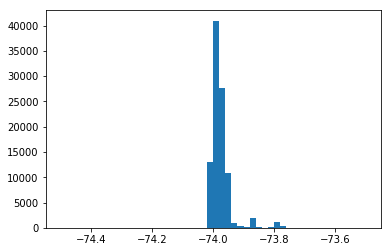

In [12]:
plt.hist(df_train.pickup_longitude,bins=50,range=(-74.5,-73.5))

(array([0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 3.0000e+00,
        4.5000e+01, 9.6000e+01, 8.0000e+00, 7.0000e+00, 1.3000e+01,
        9.0000e+00, 2.2000e+01, 1.9000e+01, 1.7300e+02, 1.2404e+04,
        3.7115e+04, 2.8337e+04, 1.2763e+04, 2.1500e+03, 1.0860e+03,
        4.7800e+02, 1.4720e+03, 2.7700e+02, 1.9800e+02, 1.9400e+02,
        6.9100e+02, 1.6400e+02, 4.0000e+01, 2.7000e+01, 1.8000e+01,
        4.0000e+00, 7.0000e+00, 1.1000e+01, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-74.5 , -74.48, -74.46, -74.44, -74.42, -74.4 , -74.38, -74.36,
        -74.34, -74.32, -74.3 , -74.28, -74.26, -74.24, -74.22, -74.2 ,
        -74.18, -74.16, -74.14, -74.12, -74.1 , -74.08, -74.06, -74.04,
        -74.02, -74.  , -73.98, -73.96, -73.94, -73.92, -73.9 , -73.88,
        -73.86, -73.84, -73.82

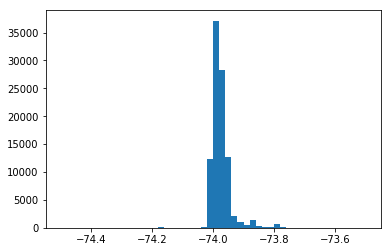

In [13]:
plt.hist(df_train.dropoff_longitude,bins=50,range=(-74.5,-73.5))

(array([3.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 3.0000e+00, 1.4000e+01, 2.8000e+01, 2.9000e+01,
        4.5000e+01, 7.5000e+01, 8.2000e+01, 1.7200e+02, 7.8300e+02,
        1.9600e+02, 4.1900e+02, 6.4800e+02, 8.8800e+02, 9.6200e+02,
        2.5500e+03, 4.5350e+03, 7.8950e+03, 9.3770e+03, 1.3137e+04,
        1.7643e+04, 1.5574e+04, 1.0625e+04, 5.9800e+03, 2.4620e+03,
        1.7060e+03, 6.1300e+02, 4.0100e+02, 2.0800e+02, 2.4000e+02,
        2.2300e+02, 1.1000e+02, 6.3000e+01, 5.9000e+01, 2.5000e+01,
        2.2000e+01, 7.0000e+00, 6.0000e+00, 5.0000e+00, 2.0000e+00,
        5.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([40.5 , 40.51, 40.52, 40.53, 40.54, 40.55, 40.56, 40.57, 40.58,
        40.59, 40.6 , 40.61, 40.62, 40.63, 40.64, 40.65, 40.66, 40.67,
        40.68, 40.69, 40.7 , 40.71, 40.72, 40.73, 40.74, 40.75, 40.76,
        40.77, 40.78, 40.79, 40.8 , 40.81, 40.82, 40.83, 40.84, 40.85,
        40.86, 40.87, 40.88, 40.89

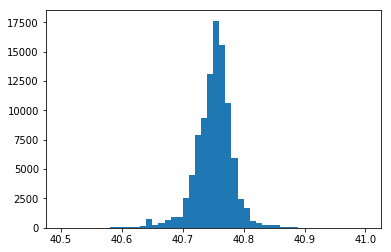

In [14]:
plt.hist(df_train.dropoff_latitude,bins=50,range=(40.5,41))

In [15]:
up_lat_mean=df_train.pickup_latitude.mean();up_lat_mean

40.751050214328785

In [16]:
up_long_mean=df_train.pickup_longitude.mean();up_long_mean

-73.97499885302211

In [17]:
off_lat_mean=df_train.dropoff_latitude.mean();off_lat_mean

40.75148538020601

In [18]:
off_long_mean=df_train.dropoff_longitude.mean();off_long_mean

-73.9739155926107

In [19]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    df['abs_dist_travel'] = df.abs_diff_longitude + df.abs_diff_latitude

add_travel_vector_features(df_train)


/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [20]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194
...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5,0.016285,0.007555,0.023840
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1,0.011260,0.012620,0.023880
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1,0.004799,0.001175,0.005974
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4,0.000937,0.010400,0.011337


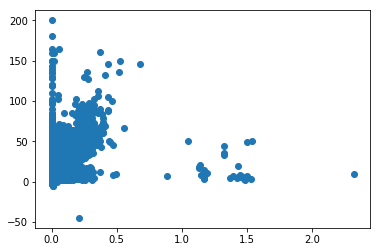

In [21]:
plt.scatter(df_train.abs_dist_travel,df_train.fare_amount)

In [22]:
df_train.sort_values(by='abs_diff_latitude')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel
49774,2010-02-15 19:31:00.00000054,49.57,2010-02-15 19:31:00 UTC,-73.925295,40.733120,-73.925295,40.733120,2,0.000000,0.000000,0.000000
94966,2009-12-23 08:04:00.00000097,6.50,2009-12-23 08:04:00 UTC,-73.816903,40.664087,-73.816903,40.664087,1,0.000000,0.000000,0.000000
48074,2013-03-22 08:33:00.000000143,5.50,2013-03-22 08:33:00 UTC,-73.970447,40.770265,-73.970447,40.770265,3,0.000000,0.000000,0.000000
48068,2012-08-10 12:11:00.000000192,7.30,2012-08-10 12:11:00 UTC,-73.982430,40.752457,-73.982430,40.752457,6,0.000000,0.000000,0.000000
94951,2010-03-24 01:28:47.0000003,7.70,2010-03-24 01:28:47 UTC,-73.971885,40.760270,-73.971885,40.760270,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
91516,2011-02-15 11:33:44.0000003,9.70,2011-02-15 11:33:44 UTC,-73.981136,39.608649,-73.962778,40.766702,1,0.018359,1.158053,1.176412
87219,2011-04-05 10:47:15.0000004,10.50,2011-04-05 10:47:15 UTC,-73.954581,40.765590,-73.982771,39.603429,1,0.028190,1.162161,1.190351
14536,2011-04-03 12:16:46.0000004,4.10,2011-04-03 12:16:46 UTC,-73.982155,40.775187,-73.976399,39.610030,1,0.005756,1.165157,1.170913
10710,2011-02-11 21:46:09.0000001,3.70,2011-02-11 21:46:09 UTC,-73.955411,39.604164,-73.955647,40.772837,1,0.000237,1.168673,1.168910


In [23]:
df_train.sort_values(by='abs_diff_longitude')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel
63392,2011-12-11 16:45:00.000000139,6.50,2011-12-11 16:45:00 UTC,-73.982215,40.772895,-73.982215,40.772895,3,0.000000,0.000000,0.000000
35045,2013-06-26 01:25:00.00000015,4.50,2013-06-26 01:25:00 UTC,-73.993992,40.728832,-73.993992,40.728832,1,0.000000,0.000000,0.000000
55756,2012-04-17 14:23:12.0000003,2.90,2012-04-17 14:23:12 UTC,-73.936628,40.794345,-73.936628,40.794345,1,0.000000,0.000000,0.000000
35026,2011-05-05 16:40:00.00000055,10.10,2011-05-05 16:40:00 UTC,-73.866828,40.770237,-73.866828,40.770237,1,0.000000,0.000000,0.000000
78615,2012-03-27 00:01:09.0000002,16.10,2012-03-27 00:01:09 UTC,-73.863140,40.769268,-73.863140,40.769268,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5663,2009-02-25 07:05:05.0000003,49.15,2009-02-25 07:05:05 UTC,-73.137393,41.366138,-74.000940,40.731723,1,0.863547,0.634415,1.497962
81404,2009-11-15 19:32:25.0000004,7.30,2009-11-15 19:32:25 UTC,-73.137393,41.366138,-74.008971,40.738719,2,0.871578,0.627419,1.498997
58224,2010-04-30 20:53:02.0000001,3.70,2010-04-30 20:53:02 UTC,-73.137393,41.366138,-74.010581,40.709605,1,0.873188,0.656533,1.529721
29007,2009-03-24 11:49:20.0000001,50.00,2009-03-24 11:49:20 UTC,-73.137393,41.366138,-74.011292,40.702179,1,0.873899,0.663959,1.537858


In [24]:
add_travel_vector_features(df_test)

In [25]:
df_test.sort_values(by='abs_diff_longitude')

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel
2191,2014-05-12 20:56:48.0000004,2014-05-12 20:56:48 UTC,-73.965073,40.776434,-73.965073,40.776434,1,0.000000,0.000000,0.000000
8632,2009-10-29 10:48:40.0000003,2009-10-29 10:48:40 UTC,-73.996274,40.751946,-73.996274,40.751946,3,0.000000,0.000000,0.000000
2071,2011-12-13 22:00:00.000000254,2011-12-13 22:00:00 UTC,-73.956040,40.803803,-73.956040,40.803803,1,0.000000,0.000000,0.000000
6517,2009-06-04 19:34:15.0000001,2009-06-04 19:34:15 UTC,-73.137393,41.366138,-73.137393,41.366138,1,0.000000,0.000000,0.000000
9006,2013-07-02 22:27:14.0000001,2013-07-02 22:27:14 UTC,-73.988070,40.622553,-73.988070,40.622553,4,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5115,2015-06-30 20:03:50.0000001,2015-06-30 20:03:50 UTC,-73.864067,40.769894,-74.176849,40.694592,1,0.312782,0.075302,0.388084
7269,2011-05-28 17:29:44.0000001,2011-05-28 17:29:44 UTC,-73.979941,40.775850,-73.587237,40.722705,2,0.392704,0.053145,0.445849
5887,2010-07-04 16:44:11.0000002,2010-07-04 16:44:11 UTC,-73.137393,41.366138,-73.982629,40.767240,1,0.845236,0.598898,1.444134
4080,2010-06-11 13:37:21.0000004,2010-06-11 13:37:21 UTC,-73.137393,41.366138,-73.984145,40.732925,1,0.846752,0.633213,1.479965


In [26]:
df_test.sort_values(by='abs_dist_travel')

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel
8517,2011-03-11 01:44:00.00000067,2011-03-11 01:44:00 UTC,-73.982675,40.742583,-73.982675,40.742583,3,0.000000,0.000000,0.000000
5683,2010-05-06 11:35:26.0000003,2010-05-06 11:35:26 UTC,-73.137393,41.366138,-73.137393,41.366138,1,0.000000,0.000000,0.000000
2731,2011-09-20 18:02:28.0000001,2011-09-20 18:02:28 UTC,-73.988104,40.739190,-73.988104,40.739190,1,0.000000,0.000000,0.000000
860,2010-08-27 18:45:00.000000196,2010-08-27 18:45:00 UTC,-73.999005,40.754848,-73.999005,40.754848,1,0.000000,0.000000,0.000000
2381,2010-02-21 21:57:20.0000001,2010-02-21 21:57:20 UTC,-73.944713,40.767504,-73.944713,40.767504,1,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5115,2015-06-30 20:03:50.0000001,2015-06-30 20:03:50 UTC,-73.864067,40.769894,-74.176849,40.694592,1,0.312782,0.075302,0.388084
7269,2011-05-28 17:29:44.0000001,2011-05-28 17:29:44 UTC,-73.979941,40.775850,-73.587237,40.722705,2,0.392704,0.053145,0.445849
5887,2010-07-04 16:44:11.0000002,2010-07-04 16:44:11 UTC,-73.137393,41.366138,-73.982629,40.767240,1,0.845236,0.598898,1.444134
8529,2009-11-25 19:32:52.0000001,2009-11-25 19:32:52 UTC,-73.137393,41.366138,-73.986561,40.757966,3,0.849168,0.608172,1.457340


In [27]:
df_train['up_diff_center'] = np.sqrt((df_train.pickup_latitude-up_lat_mean)**2 + (df_train.pickup_longitude-up_long_mean)**2)

/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_train['off_diff_center'] = np.sqrt((df_train.dropoff_latitude-off_lat_mean)**2 + (df_train.dropoff_longitude-off_long_mean)**2)

/home/garyh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel,up_diff_center,off_diff_center
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,0.011742,0.134027,0.137993
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,0.107481,0.057139,0.030984
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,0.019212,0.012819,0.017351
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,0.029386,0.021629,0.018847
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,0.027194,0.018309,0.036602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013-09-24 07:39:00.00000071,9.0,2013-09-24 07:39:00 UTC,-73.947977,40.784792,-73.964262,40.792347,5,0.016285,0.007555,0.023840,0.043228,0.041986
99996,2014-05-15 12:15:45.0000001,6.0,2014-05-15 12:15:45 UTC,-73.962918,40.799107,-73.974178,40.786487,1,0.011260,0.012620,0.023880,0.049552,0.035003
99997,2015-02-19 17:40:43.0000001,5.0,2015-02-19 17:40:43 UTC,-73.996773,40.723549,-73.991974,40.724724,1,0.004799,0.001175,0.005974,0.035077,0.032284
99998,2009-10-10 23:35:00.000000165,6.9,2009-10-10 23:35:00 UTC,-73.983652,40.756667,-73.982715,40.767067,4,0.000937,0.010400,0.011337,0.010316,0.017895


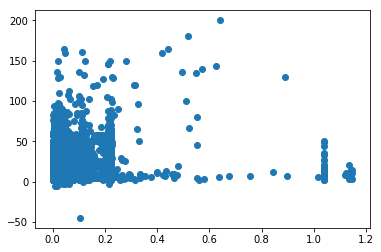

In [30]:
plt.scatter(df_train.up_diff_center,df_train.fare_amount)

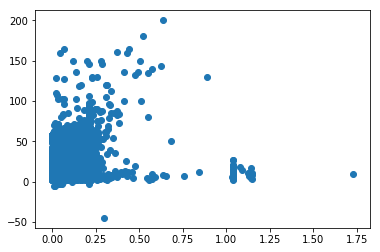

In [31]:
plt.scatter(df_train.off_diff_center,df_train.fare_amount)

In [32]:
timecolumn=df_train['pickup_datetime']

In [33]:
timecolumn

0        2009-06-15 17:26:21 UTC
1        2010-01-05 16:52:16 UTC
2        2011-08-18 00:35:00 UTC
3        2012-04-21 04:30:42 UTC
4        2010-03-09 07:51:00 UTC
                  ...           
99995    2013-09-24 07:39:00 UTC
99996    2014-05-15 12:15:45 UTC
99997    2015-02-19 17:40:43 UTC
99998    2009-10-10 23:35:00 UTC
99999    2010-11-09 16:09:00 UTC
Name: pickup_datetime, Length: 97896, dtype: object

In [34]:
time_dt=pd.to_datetime(timecolumn)

In [35]:
time_dt[0]

Timestamp('2009-06-15 17:26:21')

In [ ]:
time_dt.dt.hour

In [ ]:
time_dt_hour=pd.to_datetime(timecolumn[0:20]).dt.hour

In [ ]:
time_dt_hour

In [ ]:
time_dt_year=pd.to_datetime(timecolumn[0:20]).dt.year;time_dt_year

In [ ]:
def add_time_features(df):
    timecol=pd.to_datetime(df['pickup_datetime'])
    df['pickup_year'] = timecol.dt.year
    df['pickup_month'] = timecol.dt.month
    df['pickup_day'] = timecol.dt.day
    df['pickup_hour'] = timecol.dt.hour

add_time_features(df_train)

In [ ]:
df_train.sort_values(by='pickup_year')

In [ ]:
plt.scatter(df_train.pickup_hour,df_train.fare_amount)

In [ ]:
plt.scatter(df_train.pickup_year,df_train.fare_amount)

In [ ]:
plt.scatter(df_train.pickup_month,df_train.fare_amount)

In [ ]:
test_year=[]
for i in range(2009,2016):
    test_year.append(df_train.loc[df_train['pickup_year']==i,['pickup_year','fare_amount']].mean().tolist())

test_year=np.asarray(test_year)
plt.plot(test_year[0:,0],test_year[0:,1])

In [ ]:
test_month=[]
for i in range(12):
    test_month.append(df_train.loc[df_train['pickup_month']==i+1,['pickup_month','fare_amount']].mean().tolist())

test_month=np.asarray(test_month)
plt.plot(test_month[0:,0],test_month[0:,1])

In [ ]:
test_hour=[]
for i in range(24):
    test_hour.append(df_train.loc[df_train['pickup_hour']==i+1,['pickup_hour','fare_amount']].mean().tolist())

test_hour=np.asarray(test_hour)
plt.plot(test_hour[0:,0],test_hour[0:,1])

In [ ]:
test_day=[]
for i in range(30):
    test_day.append(df_train.loc[df_train['pickup_day']==i+1,['pickup_day','fare_amount']].mean().tolist())

test_day=np.asarray(test_day)
plt.plot(test_day[0:,0],test_day[0:,1])

In [ ]:
test_month_2014=[]
for i in range(12):
    test_month_2014.append(df_train.loc[(df_train['pickup_month']==i+1)&(df_train['pickup_year']==2014),['pickup_month','fare_amount']].mean().tolist())

test_month_2014=np.asarray(test_month_2014)
plt.plot(test_month_2014[0:,0],test_month_2014[0:,1])

In [ ]:
test_month_2013=[]
for i in range(12):
    test_month_2013.append(df_train.loc[(df_train['pickup_month']==i+1)&(df_train['pickup_year']==2013),['pickup_month','fare_amount']].mean().tolist())

test_month_2013=np.asarray(test_month_2013)
plt.plot(test_month_2013[0:,0],test_month_2013[0:,1])

In [ ]:
test_month_2012=[]
for i in range(12):
    test_month_2012.append(df_train.loc[(df_train['pickup_month']==i+1)&(df_train['pickup_year']==2012),['pickup_month','fare_amount']].mean().tolist())

test_month_2012=np.asarray(test_month_2012)
plt.plot(test_month_2012[0:,0],test_month_2012[0:,1])

In [ ]:
test_month_2015

In [ ]:
plt.hist(df_train.fare_amount,bins=50)

In [73]:
df_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,abs_dist_travel
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,0.008110,0.019970,0.028080
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,0.012024,0.019817,0.031841
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,0.005121,0.007991
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,0.009288,0.016172,0.025460
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,0.022519,0.045348,0.067867
...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6,0.012482,0.016609,0.029091
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6,0.014702,0.027229,0.041931
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6,0.201859,0.079597,0.281456
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6,0.046394,0.066299,0.112694


In [76]:
df_test.shape[0]

9914

In [63]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.display.max_rows=10
pd.options.mode.chained_assignment = None

In [64]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    df['abs_dist_travel'] = df.abs_diff_longitude + df.abs_diff_latitude

In [65]:
def add_loc_bias_feature(df):
    lat_mean=40.75
    long_mean=-73.97
    df['up_diff_center'] = np.sqrt((df.pickup_latitude-lat_mean)**2 + (df.pickup_longitude-long_mean)**2)
    df['off_diff_center'] = np.sqrt((df.dropoff_latitude-lat_mean)**2 + (df.dropoff_longitude-long_mean)**2)

In [66]:
def add_time_features(df):
    timecol=pd.to_datetime(df['pickup_datetime'],infer_datetime_format=True)
    df['pickup_year'] = timecol.dt.year
    df['pickup_hour'] = timecol.dt.hour

In [67]:
def get_input_matrix(df):
    return (np.column_stack((np.ones(len(df)), df.abs_diff_longitude, df.abs_diff_latitude, df.abs_dist_travel, df.up_diff_center, df.off_diff_center, df.pickup_year, df.pickup_hour)),df.fare_amount.values.reshape((df.shape[0],1)))

In [68]:
df_test=pd.read_csv('../input/test.csv')

In [71]:
df_train=df_train.dropna(how = 'any', axis = 'rows')
df_train=df_train[(df_train.pickup_latitude>39)&
                  (df_train.pickup_latitude<42)&
                  (df_train.pickup_longitude>-74.5)&
                  (df_train.pickup_longitude<-72)&
                  (df_train.dropoff_latitude>39)&
                  (df_train.dropoff_latitude<42)&
                  (df_train.dropoff_longitude>-74.5)&
                  (df_train.dropoff_longitude<-72)&
                  (df_train.fare_amount > 0)&
                  (df_train.passenger_count > 0)]
add_travel_vector_features(df_train)
add_loc_bias_feature(df_train)
add_time_features(df_train)

In [72]:
train_X,train_y = get_input_matrix(df_train.iloc[0:df_train.shape[0]*9//10,:])
valid_X,valid_y = get_input_matrix(df_train.iloc[df_train.shape[0]*9//10:,:])

In [54]:
train_X

array([[1.00000000e+00, 2.70100000e-03, 9.04100000e-03, ...,
        1.33816820e-01, 2.00900000e+03, 1.70000000e+01],
       [1.00000000e+00, 3.67800000e-02, 7.07010000e-02, ...,
        3.33189412e-02, 2.01000000e+03, 1.60000000e+01],
       [1.00000000e+00, 8.50400000e-03, 1.07080000e-02, ...,
        2.12494331e-02, 2.01100000e+03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 8.55400000e-03, 1.57420000e-02, ...,
        1.55547791e-02, 2.01000000e+03, 1.20000000e+01],
       [1.00000000e+00, 1.43700000e-02, 9.05800000e-03, ...,
        1.79626408e-02, 2.01200000e+03, 8.00000000e+00],
       [1.00000000e+00, 1.17670000e-02, 1.62350000e-02, ...,
        1.09501358e-02, 2.01300000e+03, 1.50000000e+01]])

In [55]:
train_X.shape

(175631, 8)

In [56]:
train_y

array([[ 4.5],
       [16.9],
       [ 5.7],
       ...,
       [ 7.7],
       [ 6.9],
       [ 9. ]])

In [58]:
train_y.shape

(175631, 1)

In [59]:
valid_y

array([[13.  ],
       [ 6.1 ],
       [11.3 ],
       ...,
       [ 6.9 ],
       [18.  ],
       [42.83]])

In [60]:
valid_y_est

array([[11.2 ],
       [ 7.09],
       [14.02],
       ...,
       [ 9.5 ],
       [11.99],
       [35.33]])

In [73]:
(w_lsr, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
w_lsr=w_lsr.reshape(len(w_lsr),1)
valid_y_est = np.matmul(valid_X, w_lsr).round(decimals = 2)

In [74]:
RMSE_lsr=((valid_y-valid_y_est) ** 2).mean() ** .5

In [75]:
RMSE_lsr

5.638389770647216

In [13]:
valid_y.shape

(19515,)

In [2]:
import pickle

In [3]:
with open('ModelParameter_2.p', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
data

{'W': array([[-1.07435449e+03, -1.05772342e+03, -1.04996097e+03, ...,
         -1.02679590e+03, -1.04437186e+03, -1.02425601e+03],
        [ 8.42766833e+01,  8.30513847e+01,  8.70319667e+01, ...,
          8.50937337e+01,  9.15106544e+01,  1.12023019e+02],
        [-5.20622571e+00,  3.23865790e+00, -2.02093069e+00, ...,
          1.63423790e+00, -8.39714596e+00, -2.71043305e+01],
        ...,
        [ 3.39926863e+01,  3.60196265e+01,  2.46194125e+01, ...,
          3.22304855e+01,  2.70007907e+01,  2.45642446e+01],
        [ 5.36494474e-01,  5.27978806e-01,  5.24244203e-01, ...,
          5.12692641e-01,  5.21577764e-01,  5.11429831e-01],
        [ 8.84843187e-03,  1.11391978e-02,  9.64719801e-03, ...,
          1.36946325e-02,  9.93751040e-03,  1.75315583e-02]]),
 'E': array([[  5.63838977,   6.03102568,   5.82311771,   5.43098403,
           5.71205831,   5.43716705,   5.51829181,   5.42712662,
           5.42053441,   5.18011802,   5.93988705,   6.36421922,
           5.66527509,  

In [5]:
import numpy as np

In [6]:
E=data['E']

In [7]:
W=data['W']

In [8]:
W.shape

(8, 278)

In [10]:
np.sum(E<5.5)

120

In [15]:
selection=(E<5.5)

In [22]:
selection.shape

(1, 278)

In [23]:
sel=[True, False, True]

In [24]:
sel

[True, False, True]

In [26]:
np.array(sel).shape

(3,)

In [27]:
selection.shape

(1, 278)

In [18]:
selection

array([[False, False, False,  True, False,  True, False,  True,  True,
         True, False, False, False, False,  True, False, False,  True,
         True, False, False, False,  True, False, False, False, False,
        False, False,  True, False,  True,  True,  True, False,  True,
         True, False, False, False, False, False,  True, False,  True,
        False, False,  True, False,  True, False,  True, False, False,
         True, False, False, False, False, False, False,  True, False,
         True, False, False, False,  True,  True, False,  True,  True,
         True,  True,  True, False, False, False,  True,  True,  True,
         True,  True, False, False, False, False, False,  True, False,
        False,  True, False,  True, False,  True, False, False, False,
        False,  True, False, False, False, False,  True,  True, False,
         True,  True,  True, False, False,  True,  True,  True,  True,
        False, False, False,  True, False,  True,  True, False, False,
      

In [20]:
W.shape

(8, 278)

In [30]:
W_small=W[:,selection.reshape((278,))]

In [32]:
W_small.shape

(8, 120)

In [13]:
W_small

array([[-1.07435449e+03, -1.05772342e+03, -1.04996097e+03,
        -1.05177887e+03],
       [ 8.42766833e+01,  8.30513847e+01,  8.70319667e+01,
         8.67700342e+01],
       [-5.20622571e+00,  3.23865790e+00, -2.02093069e+00,
        -2.92011012e+00],
       [ 7.90704576e+01,  8.62900426e+01,  8.50110360e+01,
         8.38499240e+01],
       [-7.39636748e+00, -8.03193436e+00, -1.67730327e+00,
        -8.39394405e+00],
       [ 3.39926863e+01,  3.60196265e+01,  2.46194125e+01,
         2.94842760e+01],
       [ 5.36494474e-01,  5.27978806e-01,  5.24244203e-01,
         5.25223681e-01],
       [ 8.84843187e-03,  1.11391978e-02,  9.64719801e-03,
         9.72703988e-03]])

In [37]:
selection.size

278

In [42]:
selection=selection.reshape((selection.size,))

In [43]:
selection.shape

(278,)

In [44]:
W_smallerr=W[:,selection]

In [45]:
W_smallerr.shape

(8, 120)

In [46]:
np.mean(E[:,selection])

5.255530208711872